## Multidimensional Recurrence Quantification Analysis
---

Multidimensional Recurrence Quantification Analysis (MdRQA) is used to uncover the dynamics of multivariate behavioural time series data. This can be useful where multiple signals are collected from one or two individuals (e.g., movement and physiology), or where we wish to collect data from groups of individuals. It is performed in much the same manner as [Continuous RQA](rqaContinuous.ipynb). However, instead of performing phase space reconstruction (see [AMI](ami.ipynb) and [FNN](fnn.ipynb)), each measured variable from the multivariate time series dataset can be used as a different phase space dimension.

As in other RQA techniques, various metrics are returned including:
- Recurrence Rate (%REC): The percentage of recurrent points in the plot, which indicates how often states between the time series reoccur with one another.
- Determinism (%DET): The percentage of recurrent points that form diagonal lines of at least a given length (e.g., 2 points), indicating how often the same sequence of states reoccurs across time series.
- Maxline: The length of the longest diagonal sequence of recurrent points. Higher values indicate prolonged periods of recurrent behaviour.
- Meanline: The average length of diagonal lines in the plot, giving insight into the typical duration of repeated patterns between the time series.
- Entropy (ENT): The Shannon entropy of the distribution of diagonal line lengths, which measures the complexity of coordination between the time series.
- Laminarity (LAM): The percentage of recurrent points forming vertical lines, which reflects instances of stationarity between the time series.

#### Parameters for Running MdRQA

Much like [Categorical](crqaCategorical.ipynb) and [Continuous](crqaContinuous.ipynb) CRQA, running MdRQA requires us to select three parameters. As noted above, however, time delay and embedding dimension can be set using the multivariate time series data as dimensions.

- Time delay: This represents the interval between samples required to unfold the temporal structure of a system's trajectory. The appropriate delay helps to reconstruct the system’s dynamics in the phase space. 
- Embedding dimension: This is the number of dimensions needed to recover the system's phase space.
- Radius: This defines how close two states must be to be considered recurrent. For continuous data, the radius is a threshold based on a distance metric (e.g., Euclidean distance), ensuring that nearby—but not necessarily identical—states are considered recurrent.


#### Let's Practice Running MdRQA

Before we begin, we need to import and load various packages and utilities. These will allow us to import the data, manipulate it, run MdRQA, and create visualisations to explore our results.

The code below will do all the setup for you. Simply click the "play" button on the left to run the code, and we'll be ready to start our analysis. 

In [1]:
import os
import pandas as pd
from utils import filter_data, interpolate_missing_data
from utils.rqa_utils import perform_mrqa
from utils.plot_utils import plot_ts_and_mdrqa

c:\Github Repos\Linear-NonLinear-TSAnalysis\.venv\Lib\site-packages\pytools\persistent_dict.py:63: RecommendedHashNotFoundWarning: Unable to import recommended hash 'siphash24.siphash13', falling back to 'hashlib.sha256'. Run 'python3 -m pip install siphash24' to install the recommended hash.
  warn("Unable to import recommended hash 'siphash24.siphash13', "


Now that all the utilities are loaded, it's time to apply MdRQA to some real data—in this case, positional data from four people performing an [object movement task](data/mdrqa/object_move_real.txt).

Just click the "play" button below to perform the analysis and generate the visualisations.

Loading file: object_move_real.txt


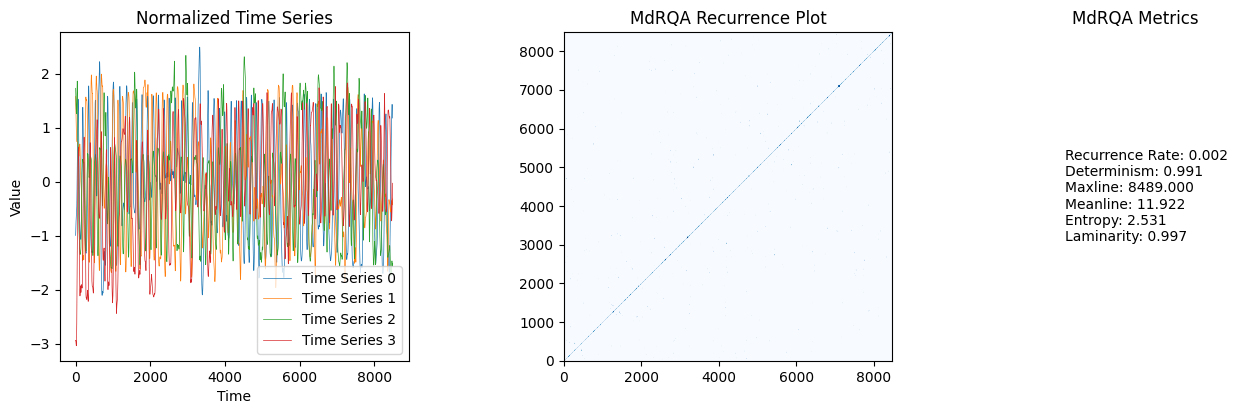

MdRQA analysis and plotting completed successfully!


In [2]:
# First set the directory path for the data
data_directory = "data/mdrqa/"

# Then decide whether you'd like to save the plots 
# These are saved in "images/rqa"
save_image = True

# Set the file name for the data
file_name = "object_move_real.txt"
file_path = os.path.join(data_directory, file_name)

# RQA parameters
mdrqa_params = {
    'radius': 0.3,
    'minLine': 2,
    'getRP': True
}

# Check whether the file containing the data exists
if os.path.exists(file_path):
    print(f'Loading file: {file_name}')

    # Load the CSV file into a DataFrame
    data = pd.read_csv(file_path, header=None)

    # Convert all columns to numeric dtype to allow interpolation
    data = data.apply(pd.to_numeric, errors='coerce')

    # Interpolate any missing data that might be present in the file
    data = interpolate_missing_data(data)

    # Apply a filter to the data
    data = filter_data(data)
    
    # Normalise the data by using a z-score
    data = (data - data.mean()) / data.std()

    # Perform CRQA using perform_rqa function from rqa_utils
    mdrqa_results, rp_results = perform_mrqa(data, **mdrqa_params)

    # Create RQA metrics dictionary
    mdrqa_metrics = {
        'Recurrence Rate': mdrqa_results.recurrence_rate,
        'Determinism': mdrqa_results.determinism,
        'Maxline': mdrqa_results.longest_diagonal_line,
        'Meanline': mdrqa_results.average_diagonal_line,
        'Entropy': mdrqa_results.entropy_diagonal_lines,
        'Laminarity': mdrqa_results.laminarity,
    }

    # Plot time series and recurrence plot side-by-side
    plot_ts_and_mdrqa(data, rp_results.recurrence_matrix, mdrqa_metrics, save_image, f'images/rqa/{file_name}_combined_plot.png')

    print('MdRQA analysis and plotting completed successfully!')
else:
    print(f'File {file_name} not found in directory {data_directory}')


#### Interpreting the Results

If your code ran successfully, you should see the following RQA metrics for the data:

- %REC: .2% - This value tells us how often the participants' positional data returns to similar states at the same time. Higher recurrence values indicate more coordination between the participants.
- %DET: 99.1% - This represents the proportion of recurrence points that form diagonal lines, reflecting the predictability of the participants' coordinated movement patterns.
- Maxline: 8489 - This metric identifies the longest sequence of recurring acceleration patterns between the four participants. A higher value here suggests that they exhibited more stable patterns of coordinated activity.
- Meanline: 11.9 - This is the average length of diagonal lines in the recurrence plot, giving us insight into the typical duration for which the participants' movements remained similar.

The participants also performed the object movement task alone. Let's compare the data from the group trial to a pseudo trial. That is, let's combine the time series from the individual trials so that we can compare the group trial to a baseline.

Loading file: posture_hrv.txt


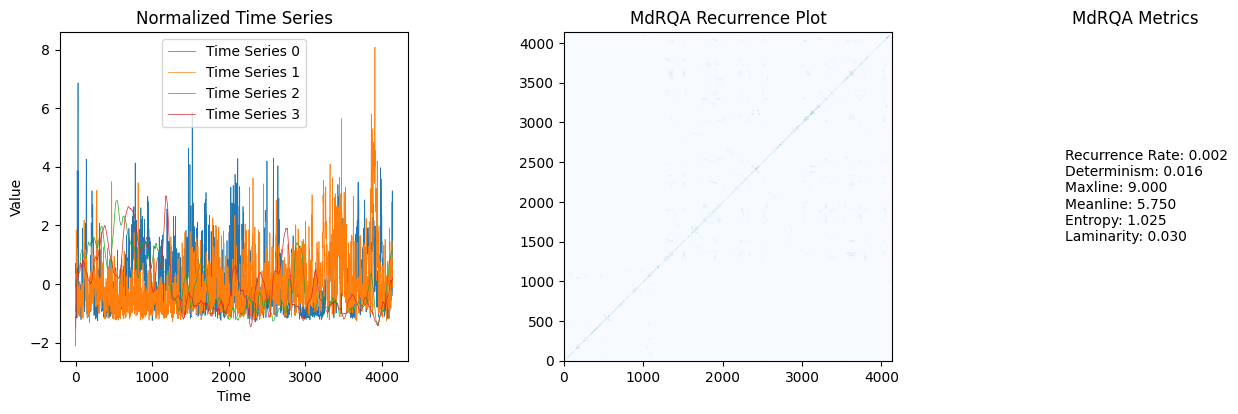

MdRQA analysis and plotting completed successfully!


In [4]:
# First set the directory path for the data
data_directory = "data/mdrqa/"

# Then decide whether you'd like to save the plots 
# These are saved in "images/rqa"
save_image = True

# Set the file name for the data
file_name = "object_move_pseudo.txt"
file_path = os.path.join(data_directory, file_name)

# RQA parameters
mdrqa_params = {
    'radius': 0.3,
    'minLine': 5,
    'getRP': True
}

# Check whether the file containing the data exists
if os.path.exists(file_path):
    print(f'Loading file: {file_name}')

    # Load the CSV file into a DataFrame
    data = pd.read_csv(file_path, header=None, sep='\t')

    # Convert all columns to numeric dtype to allow interpolation
    data = data.apply(pd.to_numeric, errors='coerce')

    # Interpolate any missing data that might be present in the file
    data = interpolate_missing_data(data)

    # Apply a filter to the data
    data = filter_data(data)
    
    # Normalise the data by using a z-score
    data = (data - data.mean()) / data.std()

    # Perform CRQA using perform_rqa function from rqa_utils
    mdrqa_results, rp_results = perform_mrqa(data, **mdrqa_params)

    # Create RQA metrics dictionary
    mdrqa_metrics = {
        'Recurrence Rate': mdrqa_results.recurrence_rate,
        'Determinism': mdrqa_results.determinism,
        'Maxline': mdrqa_results.longest_diagonal_line,
        'Meanline': mdrqa_results.average_diagonal_line,
        'Entropy': mdrqa_results.entropy_diagonal_lines,
        'Laminarity': mdrqa_results.laminarity,
    }

    # Plot time series and recurrence plot side-by-side
    plot_ts_and_mdrqa(data, rp_results.recurrence_matrix, mdrqa_metrics, save_image, f'images/rqa/{file_name}_combined_plot.png')

    print('MdRQA analysis and plotting completed successfully!')
else:
    print(f'File {file_name} not found in directory {data_directory}')


#### Comparing the Results

If you examine the recurrence plots (RPs) and the resulting RQA metrics, you'll notice that although the pseudo trial shows a similar recurrence rate (.2%), the rest of the RQA metrics are lower. This indicates less predictability (%DET) and less stable coordination (MaxLine) in the pseudo trial.

#### Going Further

To expand your understanding of MdRQA, you can try the following:

1. Analyse other time series: Repeat the analyses above with other types of data such as [multimodal (heart rate variability and postural movement) data](data/mdrqa/posture_hrv.txt).
2. Experiment with other radii: Try adjusting the radii to see how this impacts the recurrence plots and MdRQA metrics.
3. Run a windowed MdRQA: To assess how recurrence patterns change over time, explore [Windowed RQA](rqaWindowed.ipynb) which walks you through performing windowed RQA and CRQA. Although the windowed tutorial doesn't contain MdRQA, the code can be updated for those who wish to challenge themselves!